# Welcome to Jupyter!

In [1]:
def data_uploader():
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

    # Upload data from csv file
    # First read with header after creating col list add " header = None, "
    students_data = pd.read_csv("student-mat.csv")
    # it strange but csv file gives only one column so we need to split data of each row

    #creat columns name list and split one long string to 33 columns
    col = str(students_data.head(0)).split(';')

    # To delete trash data like 'Empty DataFrame\nColumns:'. Before I have found index of symbol for cutting columns[-1].rfind(']')

    col[0] = col[0][26:]
    col[-1] = col[-1][:2]

    #Split strang DF to list of separet rows
    rows_list = []
    for row in students_data.iterrows():
        rows_list.append(list(row[1].str.split(';')))

    #creat an empty DF with named columns
    df_students_data = pd.DataFrame(index=range(396), columns=col)

    #add data to each row
    for i in range(395):
        for j in range(33):
            df_students_data.loc[i][j] = rows_list[i][0][j]

    #Remove waste symbol
    df_students_data = df_students_data.replace({'"':''}, regex=True)
    return df_students_data

In [2]:
# Import charting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# Import data managment libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
## Imoprt function 
#from data_uploader_from_csv.ipynb import data_uploader

In [3]:
df = data_uploader() # corect long name - "df_students_data". I use short 'df' to make it faster

In [4]:
df = df.drop([395])

In [15]:
columns = df.columns.values
type(columns)
print(columns)

['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'guardian' 'traveltime' 'studytime' 'failures' 'schoolsup'
 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet' 'romantic'
 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences' 'G1' 'G2'
 'G3' 'passed']


In [16]:
family_col = ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian']

In [5]:
df = df.drop(['reason' ], axis=1)

In [10]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395
unique,2,2,8,2,2,2,5,5,5,5,...,5,5,5,5,5,5,34,17,17,18
top,GP,F,16,U,GT3,T,4,2,other,other,...,4,3,3,1,1,5,0,10,9,10
freq,349,208,104,307,281,354,131,115,141,217,...,195,157,130,276,151,146,115,51,50,56


In [6]:
df['Pstatus'] = df.Pstatus.astype('category').cat.codes
df['address'] = df.address.astype('category').cat.codes
df['famsize'] = df.famsize.astype('category').cat.codes
df['sex'] = df.sex.astype('category').cat.codes
df['school'] = df.school.astype('category').cat.codes
df['Mjob'] = df.Mjob.astype('category').cat.codes
df['Fjob'] = df.Fjob.astype('category').cat.codes
df['guardian'] = df.guardian.astype('category').cat.codes
 

In [7]:
df['schoolsup'] = df.schoolsup.astype('category').cat.codes
df['famsup'] = df.famsup.astype('category').cat.codes
df['paid'] = df.paid.astype('category').cat.codes
df['activities'] = df.activities.astype('category').cat.codes
df['nursery'] = df.nursery.astype('category').cat.codes
df['higher'] = df.higher.astype('category').cat.codes
df['internet'] = df.internet.astype('category').cat.codes
df['romantic'] = df.romantic.astype('category').cat.codes

In [8]:
df = df.apply(pd.to_numeric)

In [10]:
df['absences'] = df['absences'].apply(pd.to_numeric)
df['G3'] = df['G3'].apply(pd.to_numeric)
df['age'] = df['age'].apply(pd.to_numeric)
df['health'] = df['health'].apply(pd.to_numeric)

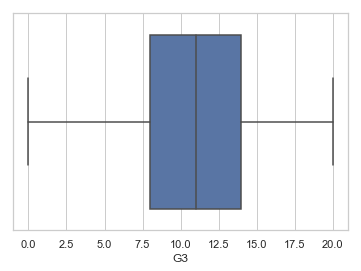

In [9]:
sns.set(style="whitegrid")
grades = df["G3"]
ax = sns.boxplot(x=grades)

In [10]:
grades.where(grades==10).count()

56

In [11]:
df['passed'] = df['G3']

In [10]:
passed_result = []
for i in grades:
    if i>=20*0.6:
        passed_result.append(1)
    else: passed_result.append(0)

In [11]:
df['passed'] = passed_result

In [12]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

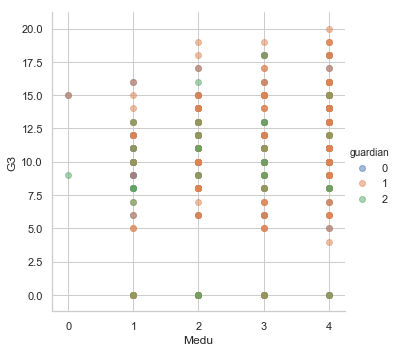

In [47]:
sns.lmplot(x='Medu', y='G3', hue='guardian', data=df, fit_reg=False, scatter_kws={'alpha':0.5});

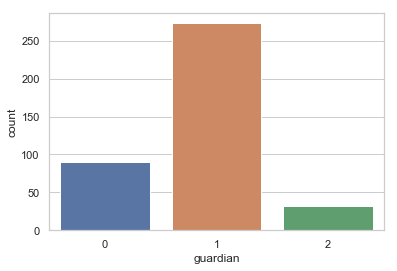

In [46]:
sns.countplot(x='guardian', data=df);

C:\Users\rveldhuisen\AppData\Local\Continuum\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


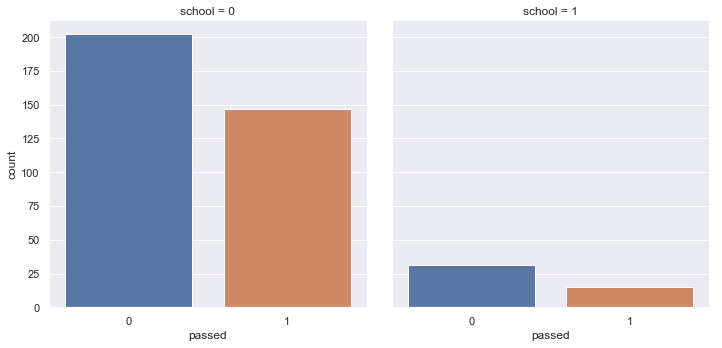

In [58]:
sns.factorplot(x='passed', col='school', kind='count', data=df);

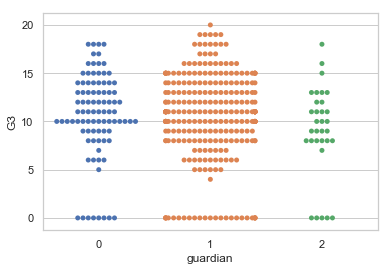

In [49]:
sns.swarmplot(x='guardian', y='G3', data=df);

In [13]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


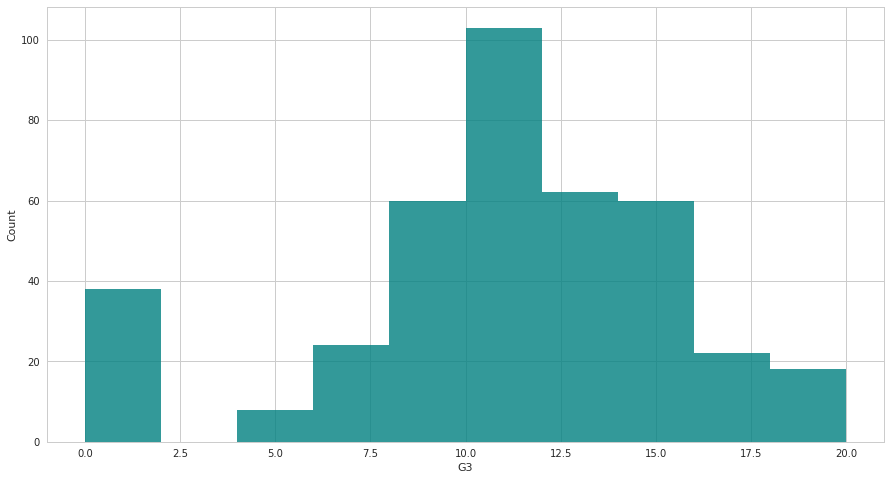

In [17]:
plt.figure(figsize=(15,8))
ax = grades.hist(bins=10, color='teal', alpha=0.8)
ax.set(xlabel='G3', ylabel='Count')
plt.show()

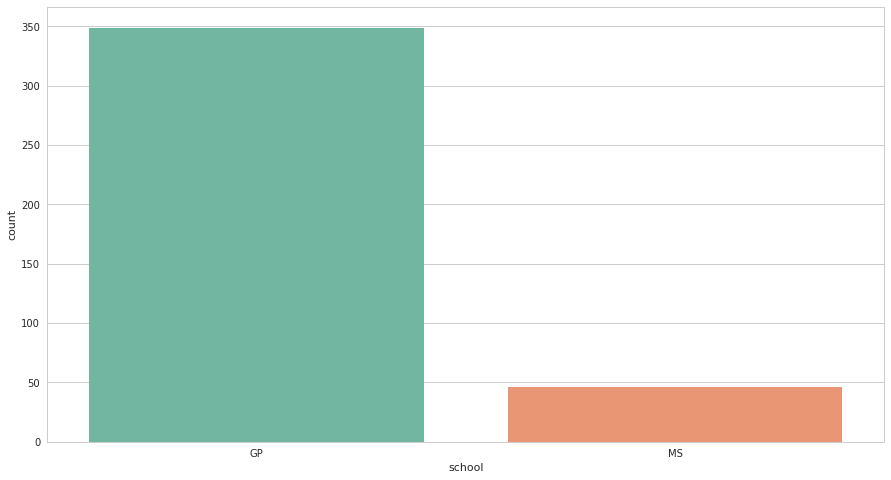

In [175]:
plt.figure(figsize=(15,8))
sns.countplot(x='school',data=df,palette='Set2')

plt.show()

In [45]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,activities
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.508861
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.500555
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [61]:
X=df.iloc[0]
Y=df['G3']

In [42]:
print(df[['G3', 'Medu', 'Fedu', 'Mjob', 'Fjob']].corr())

            G3      Medu      Fedu      Mjob      Fjob
G3    1.000000  0.217147  0.152457  0.102082  0.042286
Medu  0.217147  1.000000  0.623455  0.454805  0.157920
Fedu  0.152457  0.623455  1.000000  0.243327  0.200169
Mjob  0.102082  0.454805  0.243327  1.000000  0.196758
Fjob  0.042286  0.157920  0.200169  0.196758  1.000000


                G3       age  absences
G3        1.000000 -0.161579  0.034247
age      -0.161579  1.000000  0.175230
absences  0.034247  0.175230  1.000000


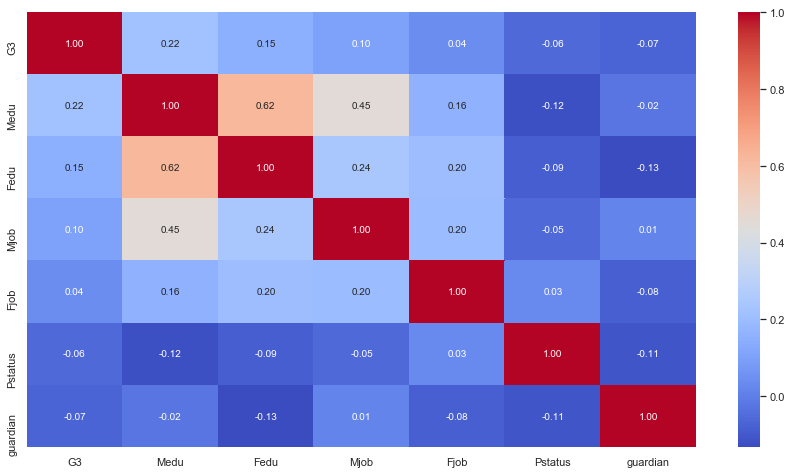

In [48]:
print(df[['G3', 'age', 'absences']].corr())
plt.figure(figsize=(15,8))
sns.heatmap(df[['G3', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'Pstatus', 'guardian']].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

In [18]:
X=df[family_col]
Y=df['passed']

In [19]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.660220
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 passed   No. Observations:                  395
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 Oct 2018   Pseudo R-squ.:                 0.02465
Time:                        01:19:10   Log-Likelihood:                -260.79
converged:                       True   LL-Null:                       -267.38
                                        LLR p-value:                   0.04026
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
famsize        0.2545      0.225      1.130      0.258      -0.187       0.696
Pstatus       -0.4003      0.

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, Y)

logreg.score(X, Y)

C:\Users\rveldhuisen\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6151898734177215

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [24]:
X3=train[family_col]
Y3=train['passed']
logit_model3=sm.Logit(Y3,X3)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
logreg.score(X3, Y3)

C:\Users\rveldhuisen\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.620253164556962

In [26]:
from sklearn.ensemble import RandomForestClassifier
 
X=df[family_col]
Y=df['passed']

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
random_forest.score(X, Y)

0.8582278481012658

In [27]:
from sklearn import tree
import graphviz
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

In [28]:
X_DT=df[family_col]
Y_DT=df['passed']

tree1.fit(X_DT, Y_DT)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
import graphviz 
tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X_DT.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz.render("tree")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'tree'], make sure the Graphviz executables are on your systems' PATH

In [ ]:
tree.export_graphviz(tree1, out_file='tree.dot')  

In [39]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

AttributeError: module 'os' has no attribute 'errno'

In [42]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','OutputFile.png'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [14]:

import matplotlib.pyplot as plt
import numpy as np

def scatterplot(x_data, y_data, size, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = size, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

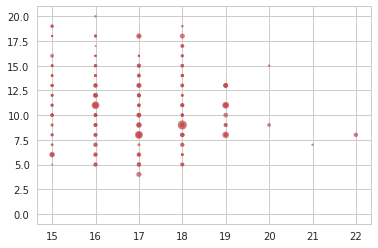

In [192]:
x_data = df['age']
y_data = df['G3']
s=df['absences']
scatterplot(x_data, y_data, s)

In [51]:
X = df.drop(['passed'], axis=1).values
y = df['passed'].values

In [13]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

NameError: name 'cross_validation' is not defined

In [54]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [55]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

ValueError: could not convert string to float: 'no'